# **Naive Bayes**

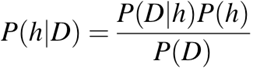

P(h): the probability of hypothesis h being true (regardless of the data). This is known as the prior probability of h.

P(D): the probability of the data (regardless of the hypothesis). This is known as the prior probability.

P(h|D): the probability of hypothesis h given the data D. This is known as posterior probability.

P(D|h): the probability of data d given that the hypothesis h was true. This is known as posterior probability.


# **Steps to calculate Naive Bayes for single feature**

*   Step 1: Calculate the prior probability for given class labels
*   Step 2: Find Likelihood probability with each attribute for each class
*  Step 3: Put these value in Bayes Formula and calculate posterior probability.
* Step 4: See which class has a higher probability, given the input belongs to the higher probability class.






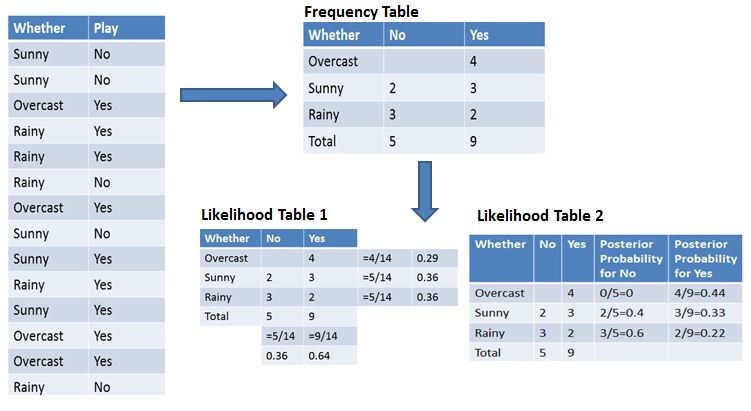

# **Naive Bayes for multiple features**

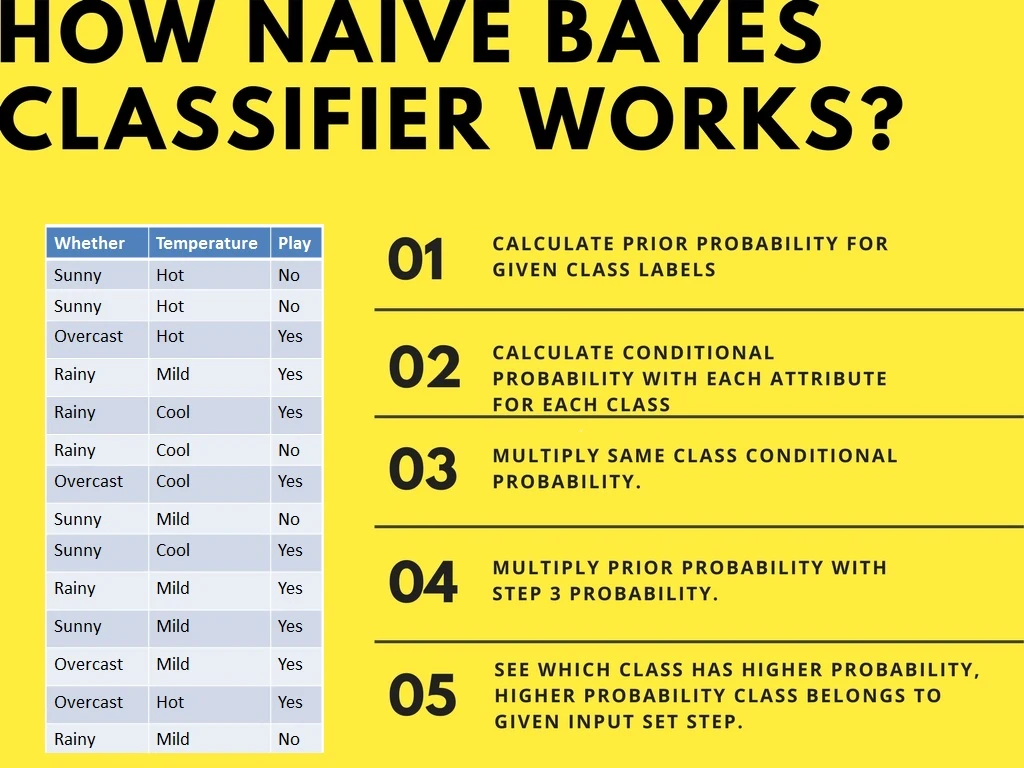

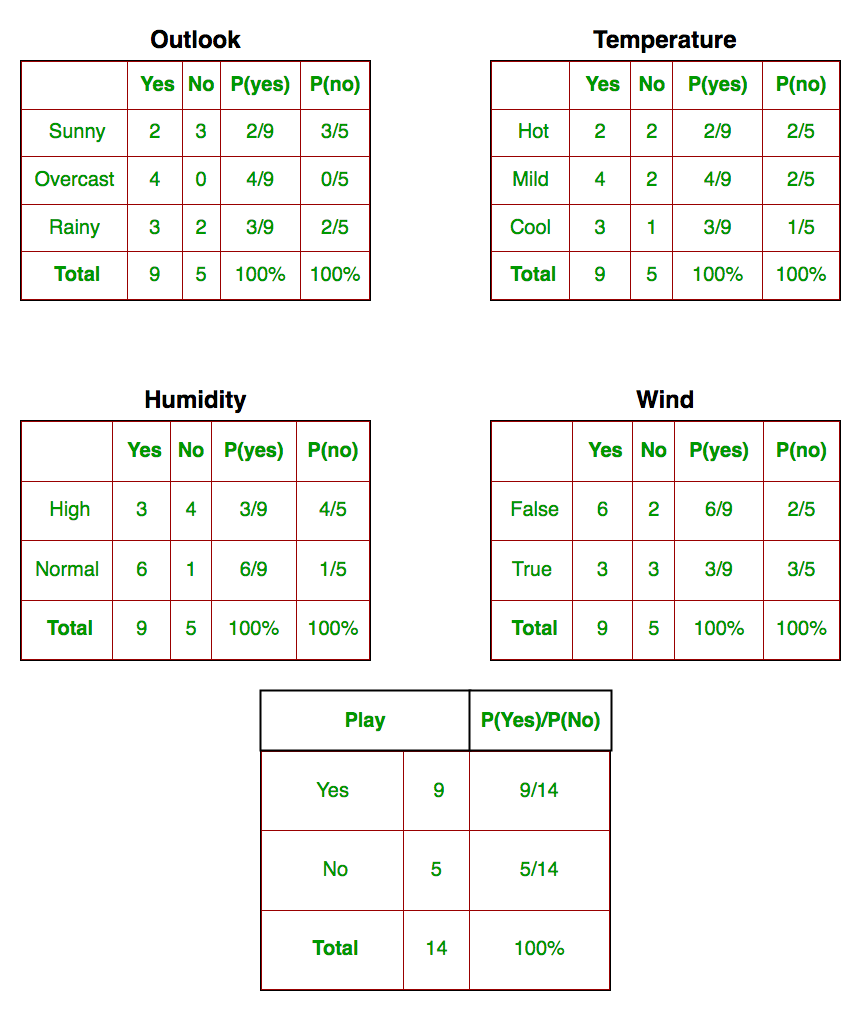

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [3]:
print(dataset.columns)       # purchased: means clicked on the ad

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [4]:
# converting into numpy array

X = dataset.iloc[:, [1, 2, 3]].values #fts        # we are dropping "user id" since it will lead to overfitting
y = dataset.iloc[:, -1].values #target

In [5]:
# encoding gender feature

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0]) # encode and give the final encoded data

In [6]:
X, y

(array([[1, 19, 19000],
        [1, 35, 20000],
        [0, 26, 43000],
        ...,
        [0, 50, 20000],
        [1, 36, 33000],
        [0, 49, 36000]], dtype=object),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 1,

In [7]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 78)

In [8]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # it will learn mu and sigma and transform my data to (x-mu)/sigma
X_test = sc.transform(X_test)

In [9]:
dataset.corr()

User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf6406de10>,
      dtype=object)

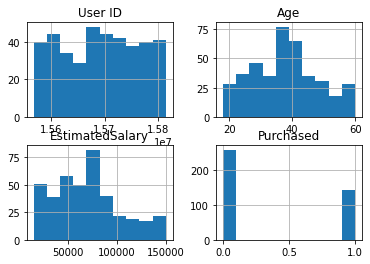

In [10]:
# plotting
dataset.hist(bins = 10)

In [11]:
# modelling
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() #if my fts are continuous - NB will assume the fts belong to normal (gaussian) distribution
classifier.fit(X_train, y_train) #compute the probabilities (likelihood, prior and marginilsation)

GaussianNB()

In [12]:
y_pred  =  classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [13]:
# predicting probablities
classifier.predict_proba(X_test)

array([[0.01814415, 0.98185585],
       [0.98863049, 0.01136951],
       [0.75087793, 0.24912207],
       [0.98600252, 0.01399748],
       [0.84693705, 0.15306295],
       [0.79415706, 0.20584294],
       [0.79451056, 0.20548944],
       [0.72274129, 0.27725871],
       [0.918967  , 0.081033  ],
       [0.78912154, 0.21087846],
       [0.02393676, 0.97606324],
       [0.10964916, 0.89035084],
       [0.28402097, 0.71597903],
       [0.68915736, 0.31084264],
       [0.91762326, 0.08237674],
       [0.98552777, 0.01447223],
       [0.84693705, 0.15306295],
       [0.66982628, 0.33017372],
       [0.98630084, 0.01369916],
       [0.91563979, 0.08436021],
       [0.45605988, 0.54394012],
       [0.3014284 , 0.6985716 ],
       [0.31444813, 0.68555187],
       [0.39271347, 0.60728653],
       [0.93266951, 0.06733049],
       [0.01508265, 0.98491735],
       [0.58973328, 0.41026672],
       [0.65663702, 0.34336298],
       [0.84920989, 0.15079011],
       [0.42232696, 0.57767304],
       [0.

In [14]:
# I am onboarding a new person who is male, 28 years old, 45000
classifier.predict(sc.transform([[1,28,50000]]))

array([0])

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, roc_auc_score, classification_report, plot_roc_curve

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix score : ",cm)

ac = accuracy_score(y_test,y_pred)
print("accuracy score : ",ac)

f1 = f1_score(y_test,y_pred)
print("f1 score : ",f1)

auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
print("AUROC score : ",auc)

confusion matrix score :  [[45  5]
 [ 3 27]]
accuracy score :  0.9
f1 score :  0.870967741935484
AUROC score :  0.9513333333333334


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.84      0.90      0.87        30

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


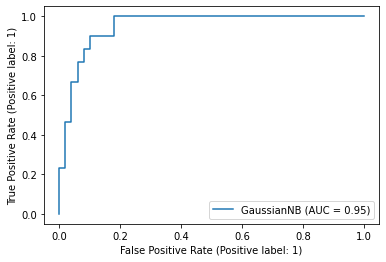

In [17]:
plot_roc_curve(classifier, X_test, y_test) 